# NB data analyse

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from mpl_toolkits.basemap import Basemap

#import cartopy.crs as ccrs  # maps plotting library
#from cartopy.io.img_tiles import GoogleTiles
#from cartopy.io.img_tiles import OSM
#from cartopy.io.srtm import srtm_composite

import datetime

#from osgeo import gdal
#from osgeo import gdal_array

Populating the interactive namespace from numpy and matplotlib


## Parsing CSV files

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


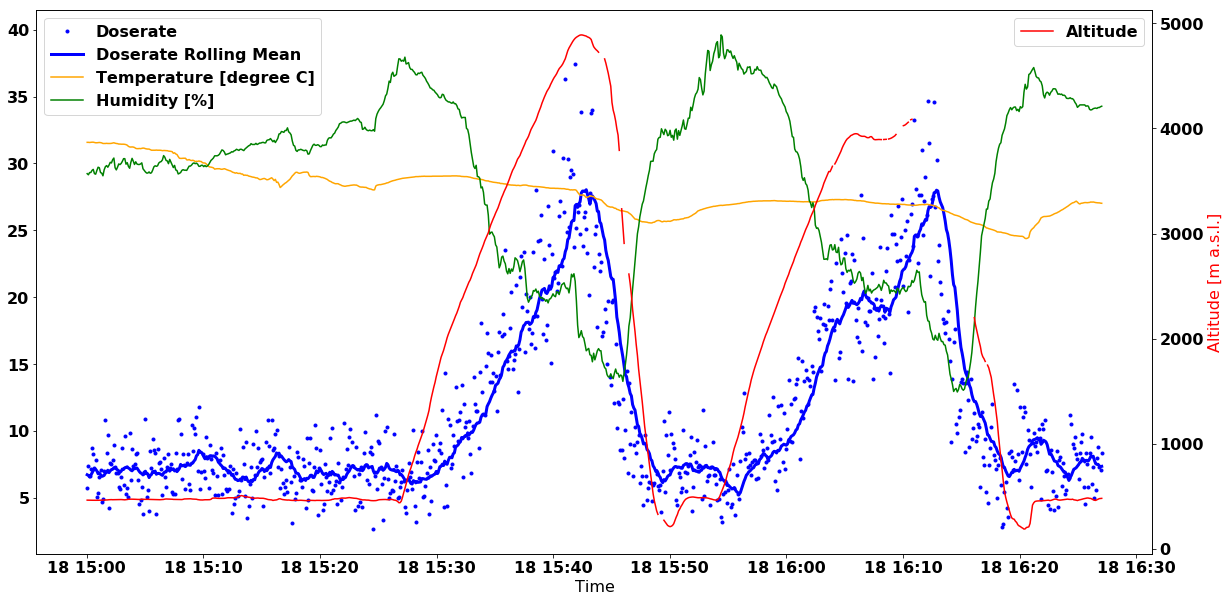

In [2]:
from_time = '2017-06-18 15:00:00'
to_time = '2017-06-18 20:00:00'

df = pd.DataFrame()

with open('./data/data_nb.csv', 'r') as thecsv:
    for line in thecsv:
        fields = [f.strip() for f in line.split('\t')]
        fields = fields[:10]
        #consist = fields[:8] + fields[-2:] + ['onemore']
        #print fields
        if (fields[0]!='Epoch'):
            try:
                df = df.append(pd.Series(map(double,fields)), ignore_index=True )
            except:
                continue

#df = df.resample('10S', how=method) # presampluje a posune cas

df[0] = pd.to_datetime(df[0],unit='s')
#df.reset_index(inplace = True)
df.set_index(0,inplace = True) # nastavi cas jako index

df['mean'] = df[8].rolling(window=20).mean()

df = df[from_time:to_time]

fig = plt.figure(figsize=(20, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

ax = plt.subplot(111)
#plt.title(nb_filepath)
plt.xlabel('Time')

plt.plot(df[8]/50, color='blue', marker='.', linestyle = '', label='Doserate')
plt.plot(df['mean']/50, color='blue', marker='', lw=3, linestyle = '-', label='Doserate Rolling Mean')
#plt.ylabel('Doserate [arbitrary unit]', color='blue')
plt.plot(df[4], color='orange', marker='', linestyle = '-', label='Temperature [degree C]')
plt.plot(df[3], color='green', marker='', linestyle = '-', label='Humidity [%]')
plt.legend(loc=2)
plt.twinx()
plt.plot(df[1], color='red', marker='', linestyle = '-', label='Altitude')
plt.ylabel('Altitude [m a.s.l.]', color='red')
plt.legend(loc=1)

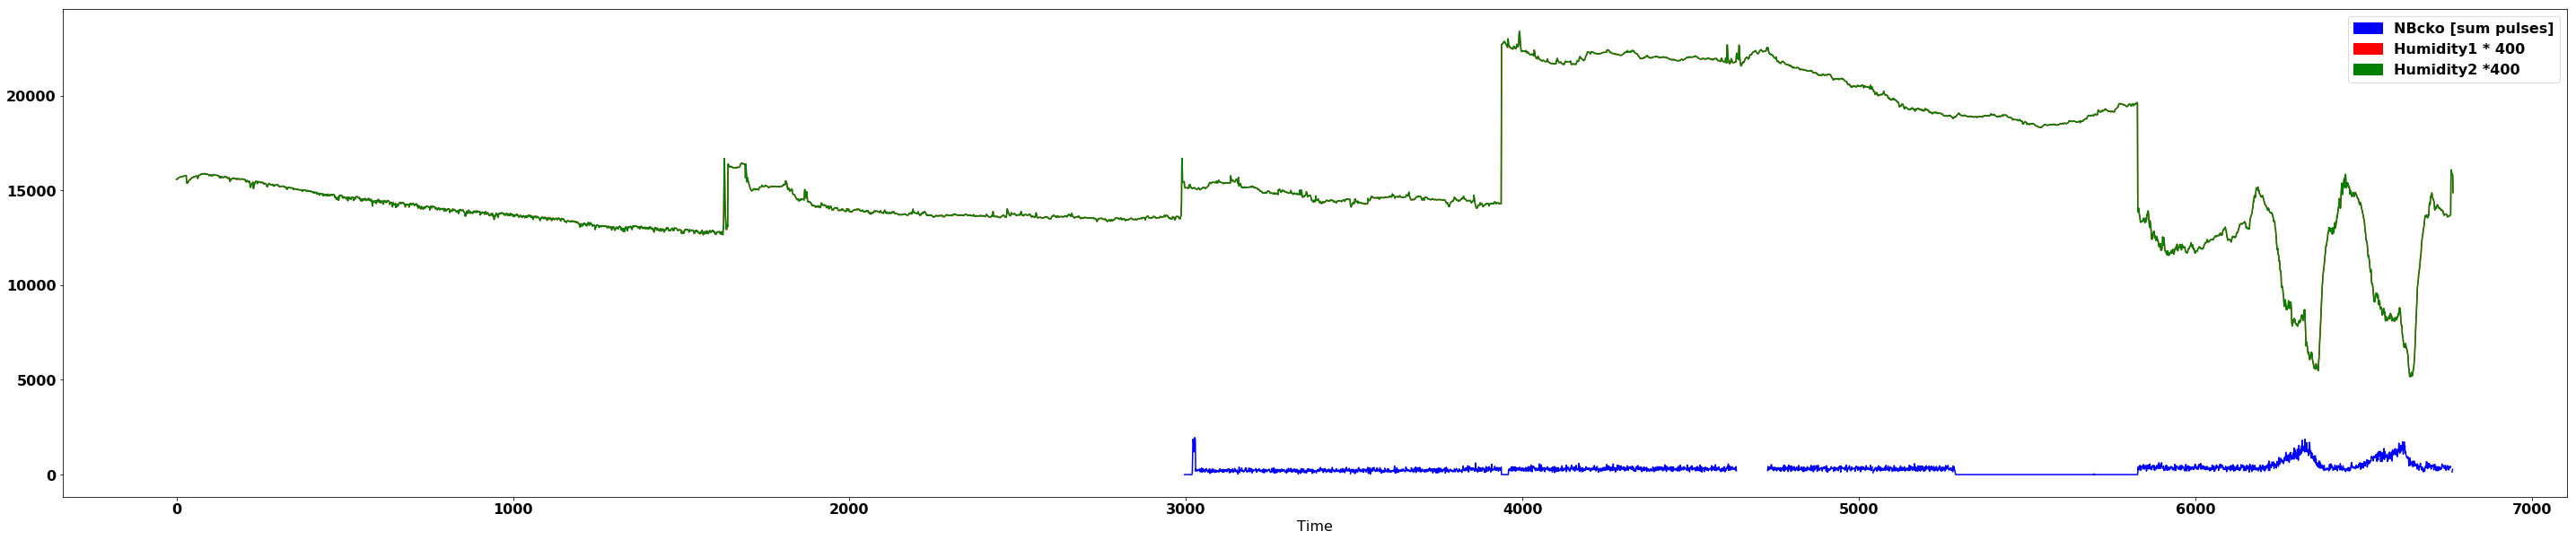

In [6]:
fig = plt.figure(figsize=(50, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

ax = plt.subplot(111)
#plt.title(nb_filepath)
plt.xlabel('Time')

plt.plot(df[8], color='blue',  linestyle = '-')
plt.plot(df[5]*400, color='red',  linestyle = '-')
plt.plot(df[3]*400, color='green',  linestyle = '-')

patch1 = matplotlib.patches.Patch(color='blue', label='NBcko [sum pulses]')
patch2 = matplotlib.patches.Patch(color='red', label='Humidity1 * 400')
patch3 = matplotlib.patches.Patch(color='green', label='Humidity2 *400')

leg = plt.legend(handles=[patch1,patch2,patch3], loc=0)
leg.get_frame().set_alpha(0.7)

## Unused ########################

In [8]:
filepath = '162003_NagHel.CSV'
title = filepath.split('/')[-1]
df = pd.read_csv(filepath,sep=',', header=None )


for row in range(0,len(df)):
    dg, m  = divmod(df.loc[row,2], 100)   # convert ggmm.mmm to gg.ggggg
    df.loc[row,2] = dg + m / 60
    dg, m  = divmod(df.loc[row,4], 100)
    df.loc[row,4] = dg + m / 60

df = df.dropna(subset=[2])

fig=plt.figure(figsize=(10,6))
#ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=0.,llcrnrlat=89.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

m.plot(df[4],df[2],color='red')

m.drawgreatcircle(10,-100,10,10,linewidth=2,color='b')

#for row in range(1,len(df)):
#for row in range(200,300):
#    plt.plot([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],
##         color=plt.cm.jet((df.loc[row,13]-0)/(15000)), marker=None, # colormap <0,1>
#          lw=3
#         )
#    m.scatter([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],lw=3,marker=None,color=plt.cm.jet((df.loc[row,13]-0)/(15000)))
    #m.scatter([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]])


IOError: File 162003_NagHel.CSV does not exist

In [136]:
dfG.reset_index(inplace = True)
dfG.set_index('to',inplace = True) # nastavi cas jako index
#dfG = dfG.resample('60S', how=sum) # presampluje
dfG = dfG.resample('60S', how=sum, loffset=pd.DateOffset(years=5,days=-139,hours=12,minutes=52)) # presampluje a posune cas

col_list = []
col_list.extend(range(19, 530)) # vyrobi seznam s cisly sloupcu s kanalama
dfP[18] = (dfP[col_list].sum(axis=1) / dfP[530]) * 40000 # secte kanaly a znormuje cetnosti na definovany pocet mereni
dfP.reset_index(inplace = True)
dfP.set_index(0,inplace = True) # nastavi cas jako index
dfP = dfP.resample('60S', how=sum) # presampluje

dfP[18][0:10]
#dfG

0
2016-03-20 02:43:00     1.843446
2016-03-20 02:44:00     2.498491
2016-03-20 02:45:00     3.261845
2016-03-20 02:46:00     1.666910
2016-03-20 02:47:00     1.667362
2016-03-20 02:48:00     3.260676
2016-03-20 02:49:00     3.184391
2016-03-20 02:50:00    23.361625
2016-03-20 02:51:00     0.761281
2016-03-20 02:52:00     2.517943
Freq: 60S, Name: 18, dtype: float64

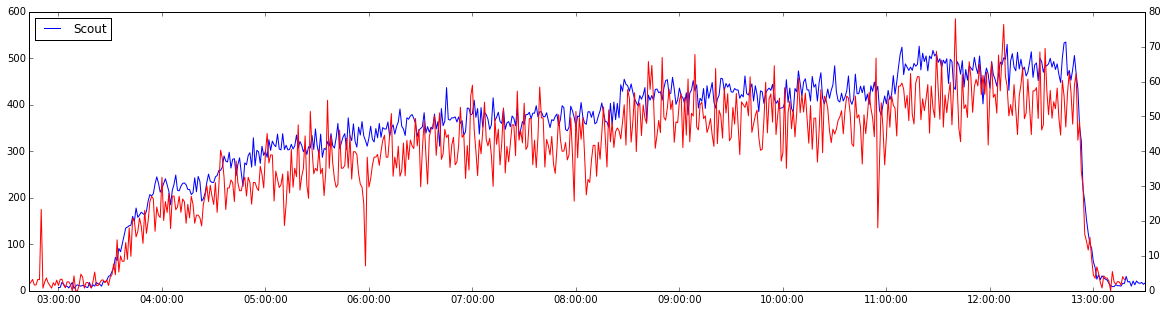

In [146]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(111)

dfGG = dfG['2016-03-20 03:00:00':'2016-03-20 13:30:00']

plt.ylim(0,600)
plt.plot(dfGG.index.to_pydatetime(),dfGG.Counts,label="Scout")
ax.legend(loc='upper right')
plt.twinx()
#plt.plot(dfP.index.to_pydatetime(), dfP[18], color='red', marker='.', linestyle = '-')
plt.plot(dfP.index.to_pydatetime(), dfP[18], color='red',label="PCRD")
ax.legend(loc='upper left')

plt.show()


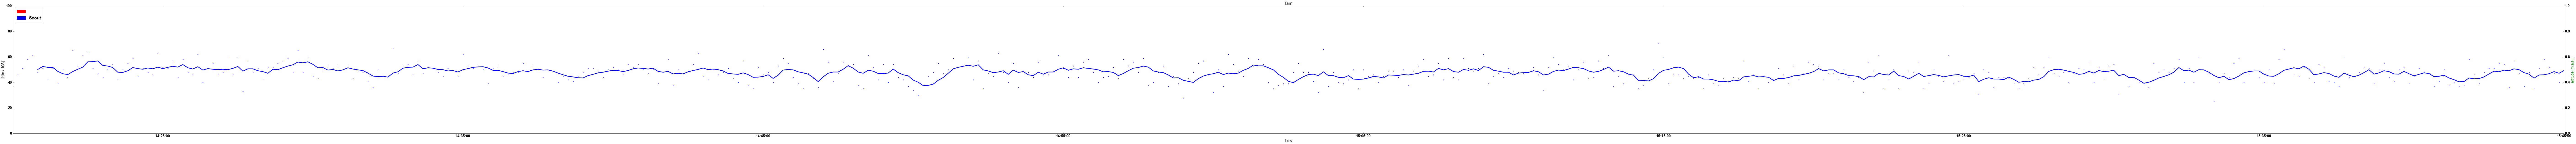

In [48]:
dfG = pd.read_csv(scout_filepath,sep=';', header=0 )
dfG = dfG.drop(dfG[dfG.Range > 10].index) # zahodi zaznamy s periodou delsi nez 10 s
dfG['to'] = pd.to_datetime(dfG['to'])

dfG.reset_index(inplace = True)
dfG.set_index('to',inplace = True) # nastavi cas jako index
dfG = dfG.resample(resampling, how=method, loffset=time_offset) # presampluje a posune cas


#fig = plt.figure(figsize=(50, 10))
fig = plt.figure(figsize=(200, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

ax = plt.subplot(111)
plt.title('Tam')
plt.xlabel('Time')

dfGG = dfG[from_time:to_time]

dfGGG = pd.rolling_mean(dfGG,6)

plt.ylim(0,100)
plt.ylabel('[hits / '+resampling+']')
plt.plot(dfGG.index.to_pydatetime(),dfGG.Counts, color='blue', marker='.', linestyle = '')
plt.plot(dfGGG.index.to_pydatetime(),dfGGG.Counts, color='blue', marker='', linestyle = '-', linewidth=3)
plt.twinx()
#plt.ylim(0,100)
plt.ylabel('altitude [m.a.s.l.]', color='green')

patch1 = matplotlib.patches.Patch(color='red', label='')
patch2 = matplotlib.patches.Patch(color='blue', label='Scout')
plt.legend(handles=[patch1,patch2], loc=2)


       0   1    2    3    4    5    6    7       8    9    ...    521  522  \
0  24329.7   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
1  24348.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
2  24358.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
3  24407.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
4  24418.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
5  24428.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   

   523  524 525  526 527  528  529    530  
0    0    0   0    0   0    0    0  39421  
1    0    0   0    0   0    0    0  51921  
2    0    0   0    0   0    0    0  48265  
3    0    0   0    0   0    0    0  47403  
4    0    0   0    0   0    0    0  52739  
5    0    0   0    0   0    0    0  48040  

[6 rows x 531 columns]
records = 3806
date = 200316 24518.0
min.altitude = -49.9   max.altitude= 11441.7
min.latitude = 24.7164833333   max.lati

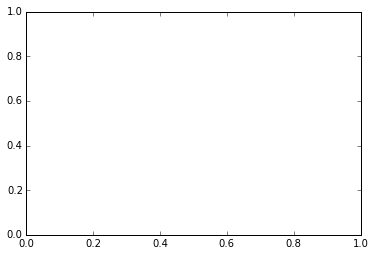

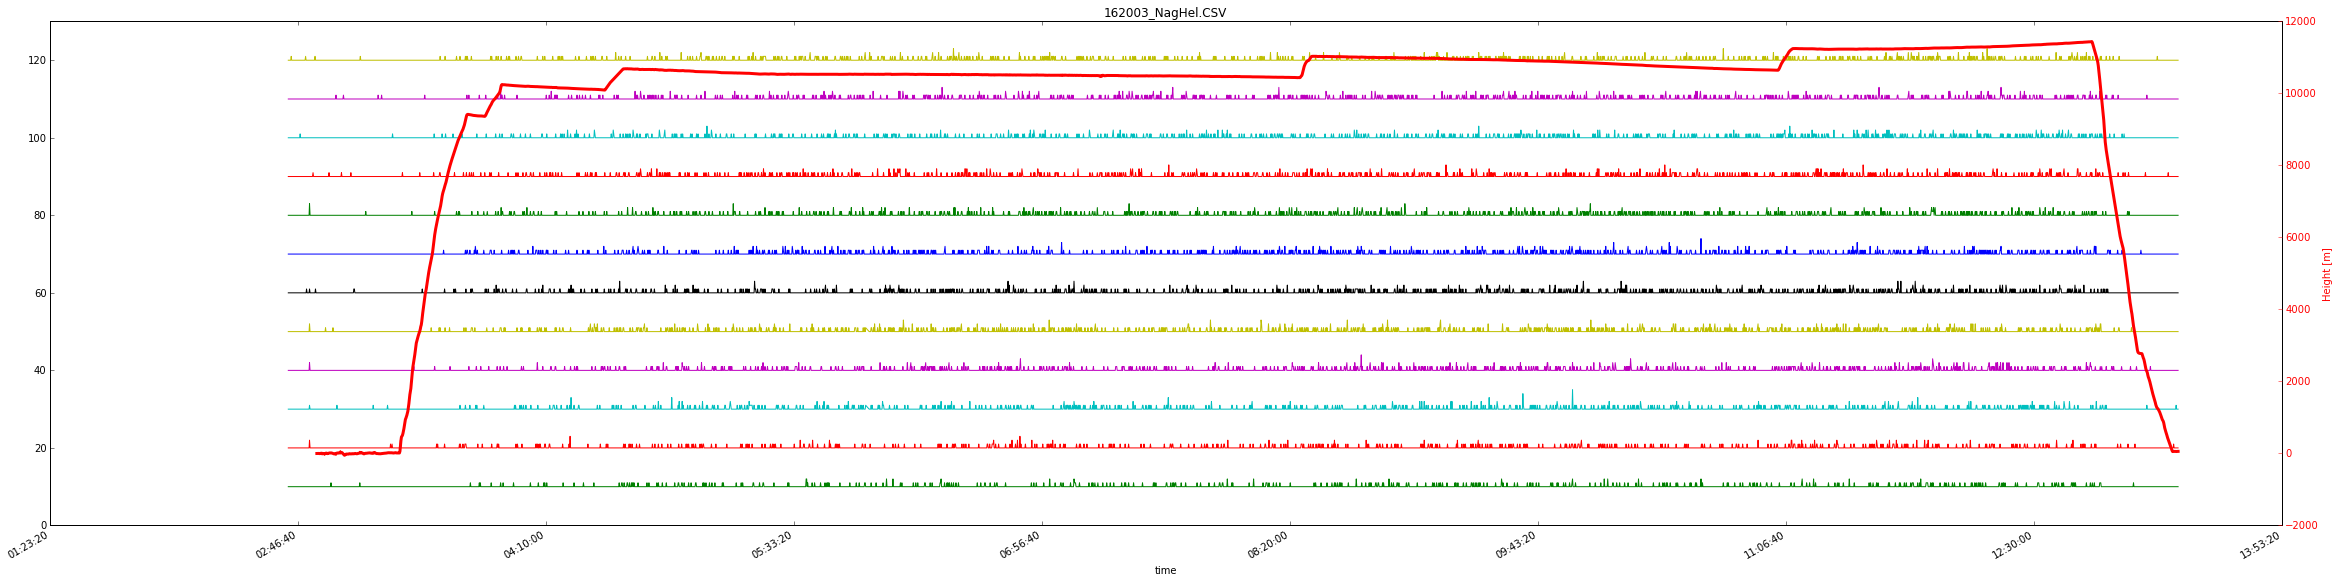

In [3]:

ax=plt.gca()# parsing input data file

plt.figure(figsize=(40, 10))


plt.ylim(0,130)

filepath = '162003_NagHel.CSV'
title = filepath.split('/')[-1]
plt.title(title)
df = pd.read_csv(filepath,sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/dukovany/15030912.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/15042609.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/1_15042609.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/2_15042609.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/3_15042610.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/NB2.CSV',sep=',', header=None )

records = len(df)
min_height = 100000
max_height = 0
min_lat = +90.
min_lon = +180.
max_lat = -90.

max_lon = -180.
date = str(df.loc[10,8]) + ' ' 
date = date + str(df.loc[10,0])

for row in range(0,records):
    dg, m  = divmod(df.loc[row,2], 100)   # convert ggmm.mmm to gg.ggggg
    df.loc[row,2] = dg + m / 60
    dg, m  = divmod(df.loc[row,4], 100)
    df.loc[row,4] = dg + m / 60
    if min_height>df.loc[row,13]:     # find maximas end minimas of important values
        min_height = df.loc[row,13]
    if max_height<df.loc[row,13]:
        max_height = df.loc[row,13]
    if min_lat>df.loc[row,2]:
        min_lat = df.loc[row,2]
    if max_lat<df.loc[row,2]:
        max_lat = df.loc[row,2]
    if min_lon>df.loc[row,4]:
        min_lon = df.loc[row,4]
    if max_lon<df.loc[row,4]:
        max_lon = df.loc[row,4]

min_lat = min_lat - 10   # add some map borders
min_lon = min_lon - 10
max_lat = max_lat + 10
max_lon = max_lon + 10
        
print df.loc[0:5,0:]
print "records =",records
print "date =",date
print "min.altitude =",min_height,"  max.altitude=",max_height 
print "min.latitude =",min_lat,"  max.latitude=",max_lat
print "min.longitude =",min_lon,"  max.longitude=",max_lon  

time = [datetime.time(0,0,0) for x in range(0, records)]
radiation2 = [0] * records
radiation3 = [0] * records
altitude = [0] * records
xx = [0] * records
line = [0] * records
avg = 1
begin = 0
end = records-avg

min_radiation = 1000
max_radiation = 0
    
n = 0
for row in range(begin, end, avg):
    h, m  = divmod(df.loc[row,0], 10000)   # hhmmss to hh
    m, s  = divmod(m, 100)   # hhmmss to hh
    time[n] = datetime.time(int(h), int(m), int(s))
    xx[n]=n
    for i in range(0, avg):
        altitude[n] = altitude[n] + df.loc[row+i,13]
        weight = 1
        for ii in range(18, 42, 2):
            radiation2[n] = radiation2[n] + (df[ii+1][row+i] - df[ii][row+i] * 120) * weight
            weight = weight + 1
    radiation2[n] = radiation2[n] / avg / 10
  
        #radiation2[n] = radiation2[n] + df.loc[row+i,18]
    #radiation2[n] = (radiation2[n] / avg)
#    radiation3[n] = radiation[n] * radiation2[n]
#    radiation[n] = 0.365 * radiation[n] + 0.52 # to pGy/s
    altitude[n] = (altitude[n] / avg) 
    
    line[n] = row    
    n = n + 1
    
values = n
      

#plt.plot(time[0:(end-begin)/avg],radiation2[0:(end-begin)/avg],  label = 'sum')
plt.plot(time[0:(end-begin)/avg],df[18][0:(end-begin)/avg],  label = '0')
plt.plot(time[0:(end-begin)/avg],df[20][0:(end-begin)/avg]+10,  label = '1')
plt.plot(time[0:(end-begin)/avg],df[22][0:(end-begin)/avg]+20,  label = '2')
plt.plot(time[0:(end-begin)/avg],df[24][0:(end-begin)/avg]+30,  label = '3')
plt.plot(time[0:(end-begin)/avg],df[26][0:(end-begin)/avg]+40,  label = '4')
plt.plot(time[0:(end-begin)/avg],df[28][0:(end-begin)/avg]+50,  label = '5')
plt.plot(time[0:(end-begin)/avg],df[30][0:(end-begin)/avg]+60,  label = '6')
plt.plot(time[0:(end-begin)/avg],df[32][0:(end-begin)/avg]+70,  label = '7')
plt.plot(time[0:(end-begin)/avg],df[34][0:(end-begin)/avg]+80,  label = '8')
plt.plot(time[0:(end-begin)/avg],df[36][0:(end-begin)/avg]+90,  label = '9')
plt.plot(time[0:(end-begin)/avg],df[38][0:(end-begin)/avg]+100,  label = '10')
plt.plot(time[0:(end-begin)/avg],df[40][0:(end-begin)/avg]+110,  label = '11')
plt.plot(time[0:(end-begin)/avg],df[42][0:(end-begin)/avg]+120,  label = '12')
#plt.plot(time[0:(end-begin)/avg],radiation3[0:(end-begin)/avg], color='yellow', label = 'radiation')
#plt.plot(time[0:(end-begin)/avg],radiation2[0:(end-begin)/avg], color='green', label = 'radiation')
plt.gcf().autofmt_xdate()
#plt.tick_params(axis='y', colors='blue')
#plt.ylabel('Dose Rate [pGy/s]',color='blue')
plt.twinx()
plt.plot(time[0:(end-begin)/avg],altitude[0:(end-begin)/avg], lw=3, color='red', label = 'height')
plt.ylabel('Height [m]',color='red')
plt.tick_params(axis='y', colors='red')

print "min.radiation =",min_radiation,"  max.radiation=",max_radiation  



In [11]:
for i in range(30, 40):
    for n in range(18,42):
        print df[n][i], 
    print radiation2[i]

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 125 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 1 128 0 0 0 0 0 0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2 254 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 1 127 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 1 129 0 0 0 0 1 125 0 0 0 0 0 0 0 0 0 0 0 0 5
1 126 0 0 2 253 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
# Track with Height

plt.figure(figsize=(15, 15))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat])
#gg_tiles = GoogleTiles()
gg_tiles = OSM()
ax.add_image(gg_tiles, 6)

plt.title(title)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
      
for row in range(1,len(df)-1):
#for row in range(200,300):
    plt.plot([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],
         color=plt.cm.jet((df.loc[row,13]-min_height)/(max_height-min_height)), marker=None, # colormap <0,1>
         transform=ccrs.PlateCarree(), lw=3
         )for row in range(1,len(df)-1):
#for row in range(200,300):
    plt.plot([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],
         color=plt.cm.jet((df.loc[row,13]-min_height)/(max_height-min_height)), marker=None, # colormap <0,1>
         transform=ccrs.PlateCarree(), lw=3
         )

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min_height, vmax=max_height))
sm._A = []
cb = plt.colorbar(sm, shrink=0.3)#for row in range(5000,7500):

cb.set_label('[m] MAMSL')


min.radiation = 0   max.radiation= 27


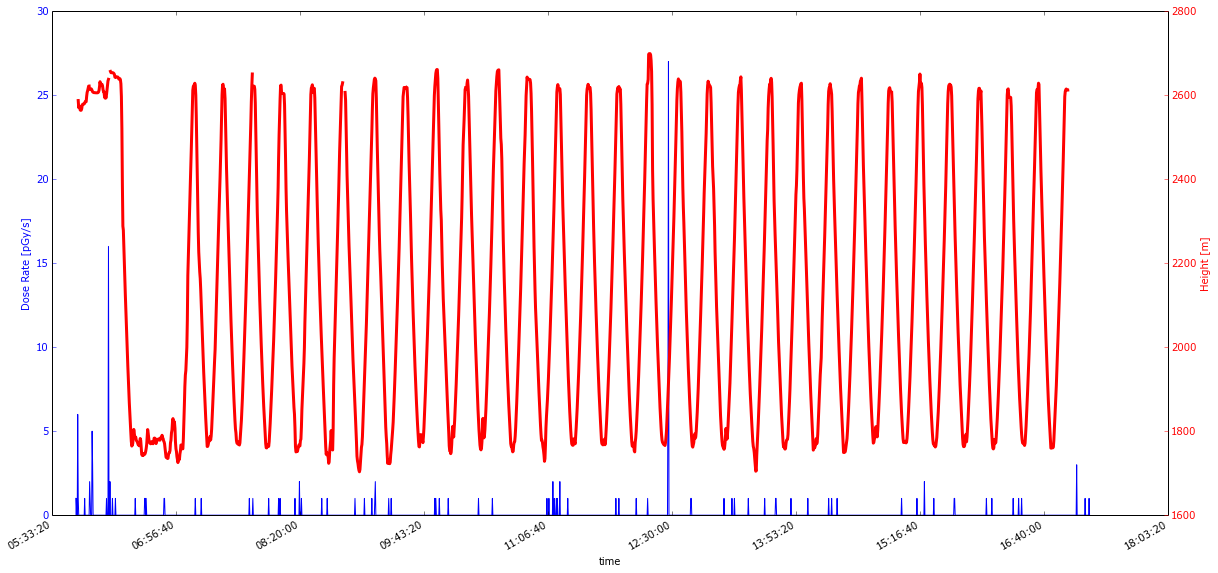

In [8]:
# Averaging

# Dose X Time

import datetime

time = [datetime.time(0,0,0) for x in range(0, records)]
radiation = [0] * records
altitude = [0] * records
xx = [0] * records
line = [0] * records
avg = 2
begin = 100
end = records-avg-100

min_radiation = 1000
max_radiation = 0
    
n = 0
for row in range(begin, end, avg):
    h, m  = divmod(df.loc[row,0], 10000)   # hhmmss to hh
    m, s  = divmod(m, 100)   # hhmmss to hh
    time[n] = datetime.time(int(h), int(m), int(s))
    xx[n]=n
    for i in range(0, avg):
        altitude[n] = altitude[n] + df.loc[row+i,13]
        radiation[n] = radiation[n] + df.loc[row+i,18]
    radiation[n] = radiation[n] / avg
    #!!! radiation[n] = 0.365 * radiation[n] + 0.52 # to pGy/s
    if min_radiation>radiation[n]:
        min_radiation=radiation[n]
    if max_radiation<radiation[n]:
        max_radiation=radiation[n]

    altitude[n] = altitude[n] / avg  
    
    line[n] = row    
    n = n + 1
    
values = n
      
plt.figure(figsize=(20, 10))
plt.plot(time[0:(end-begin)/avg],radiation[0:(end-begin)/avg], color='blue', label = 'radiation')
plt.gcf().autofmt_xdate()
plt.tick_params(axis='y', colors='blue')
plt.ylabel('Dose Rate [pGy/s]',color='blue')
plt.twinx()
plt.plot(time[0:(end-begin)/avg],altitude[0:(end-begin)/avg], lw=3, color='red', label = 'height')
plt.ylabel('Height [m]',color='red')
plt.tick_params(axis='y', colors='red')

print "min.radiation =",min_radiation,"  max.radiation=",max_radiation  


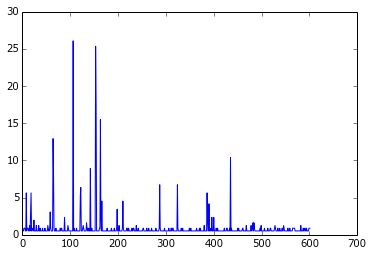

In [7]:
plt.plot(radiation[0:((end-begin)/avg)])

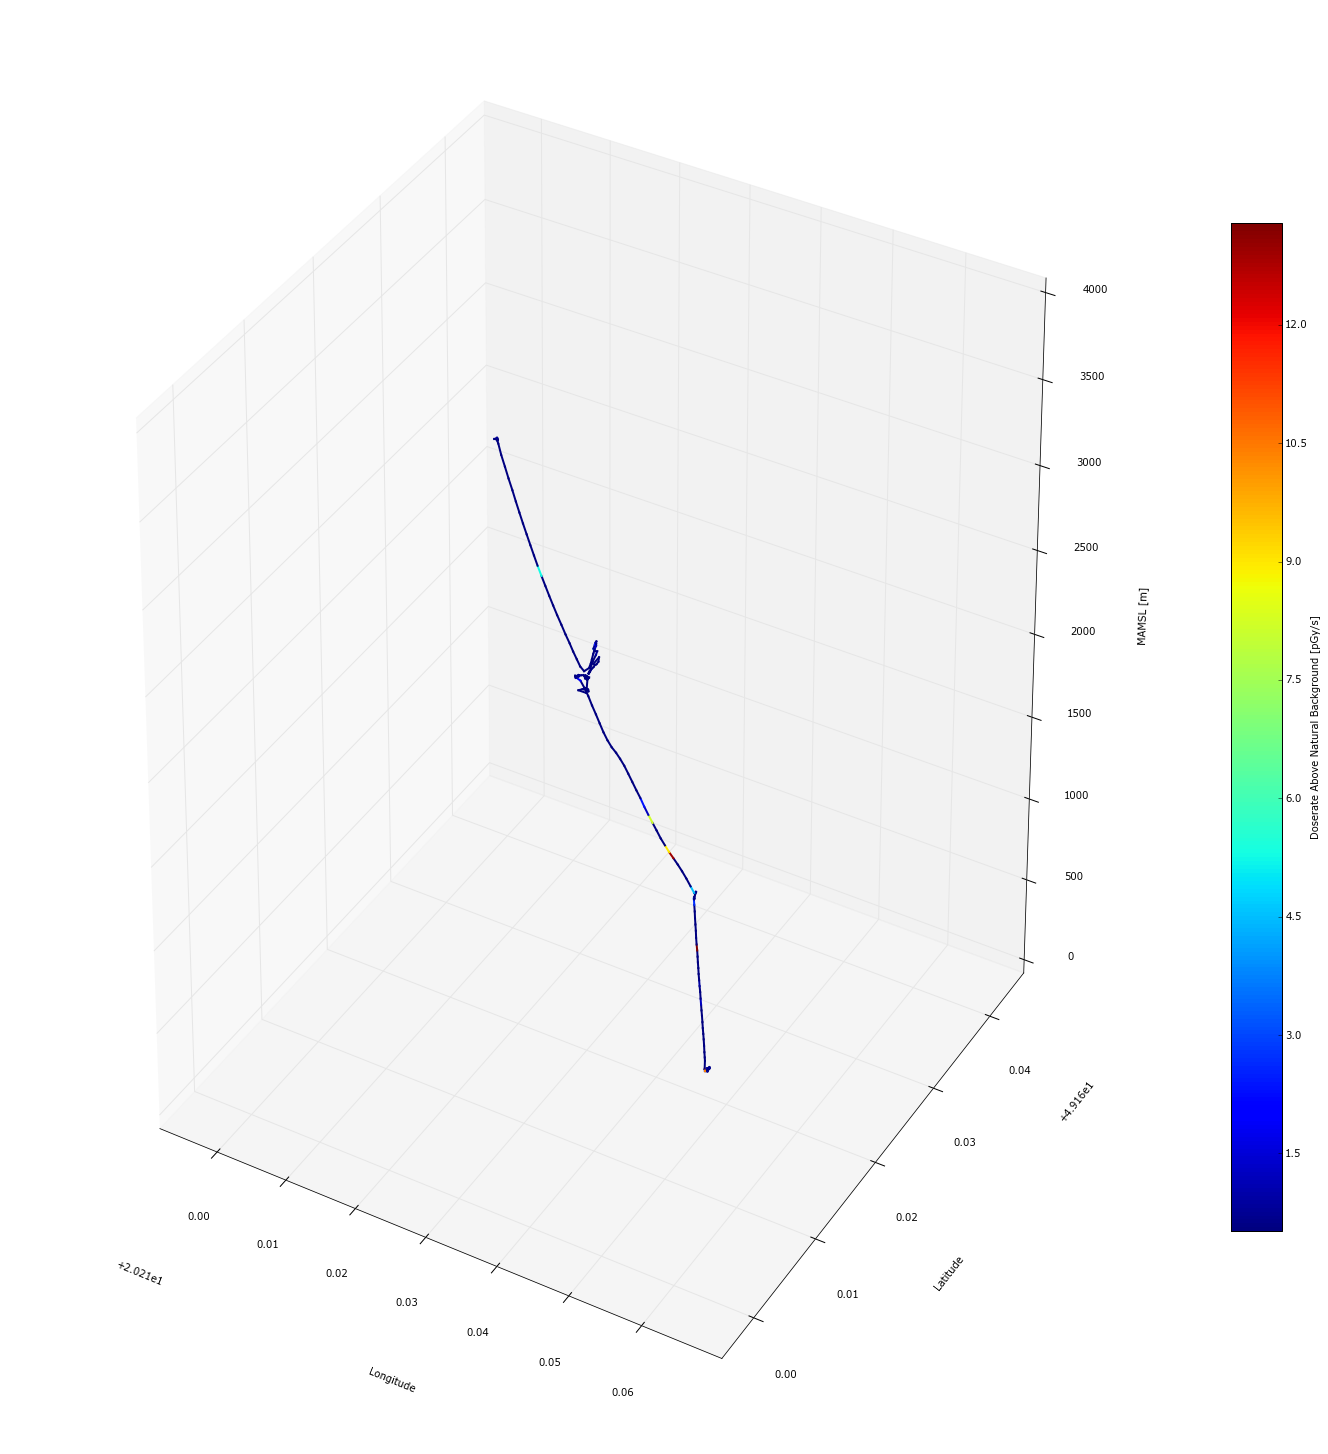

In [21]:
# 3D Dose 

import itertools

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs

#gg_tiles = OSM()

fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig, xlim=[min_lon, max_lon], ylim=[min_lat, max_lat], zlim=[0,4000])
#ax.set_zlim(bottom=0)


target_projection = ccrs.PlateCarree()


feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]


paths = list(itertools.chain.from_iterable(geos_to_path(geom) for geom in geoms))

segments = []
for path in paths:
    vertices = [vertex for vertex, _ in path.iter_segments()]
    vertices = np.asarray(vertices)
    segments.append(vertices)

lc = LineCollection(segments, color='black')

ax.add_collection3d(lc)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MAMSL [m]')

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min_radiation, vmax=max_radiation))
sm._A = []
cb = plt.colorbar(sm, shrink=0.7)
cb.set_label('Doserate Above Natural Background [pGy/s]')


#(0.365 * df.loc[100:8000,18] + 0.52) - (exp(df.loc[100:8000,13] * 0.0004) * 7.1)
#ax.scatter(df.loc[100:8000,4], df.loc[100:8000,2],df.loc[100:8000,13],c=plt.cm.jet((df.loc[100:8000,18]/((df.loc[100:8000,13]-500)/700)-10)/20), marker='_')
#ax.plot(xx[0:800], yy[0:800],altitude[0:800],c=plt.cm.jet((norm[0:800]-min)/(max-min)), marker='o-')
#for n in range(1,values):
for n in range(0,600):
    if altitude[n] > 0:
        ax.plot([df.loc[line[n-1],4],df.loc[line[n],4]], [df.loc[line[n-1],2],df.loc[line[n],2]],
        [altitude[n-1],altitude[n]], 
        color=plt.cm.jet((radiation[n]-min_radiation)/(max_radiation-min_radiation)), marker='None', lw=2)

#ax.plot([dukovany_lon,dukovany_lon], [dukovany_lat,dukovany_lat], [0,390], color='gray', marker='o')
#ax.plot([namest_lon,namest_lon], [namest_lat,namest_lat], [0,390], color='gray', marker='o')
#ax.text(dukovany_lon + 0.001, dukovany_lat + 0.01, 390, 'Dukovany', color='green', fontsize=12)
#ax.text(namest_lon + 0.001, namest_lat + 0.01, 390, 'Namest n. Osl.', color='green', fontsize=12)


[  -591988.97059154 -43889472.18660869    591980.96184218]
[[  8.93838366e+14   6.62742693e+16  -8.93838368e+14]
 [  6.62742693e+16   4.91395223e+18  -6.62742694e+16]
 [ -8.93838368e+14  -6.62742694e+16   8.93838370e+14]]


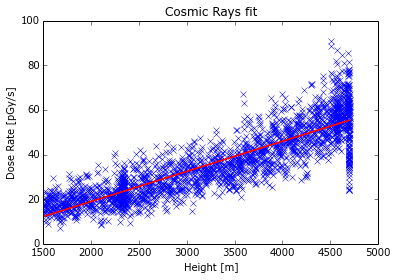

In [16]:
# Cosmic Rays fit

min_altitude = 1500

xx = [0] * values
yy = [0] * values
i = 0
for n in range(0,values):
    if altitude[n]>min_altitude:
        xx[i] = altitude[n]
        #xx[i] = altitude[n] + 2000      
        yy[i] = radiation[n]
        i = i + 1
        
nval = i - 1# Cosmic Rays fit

min_altitude = 1500

xx = [0] * values
yy = [0] * values
i = 0
for n in range(0,values):
    if altitude[n]>min_altitude:
        xx[i] = altitude[n]
        #xx[i] = altitude[n] + 2000      
        yy[i] = radiation[n]
        i = i + 1
        
nval = i - 1

def func_cr(x, a, b, c):
  return a*exp(x/b) + c

p0 = sy.array([1,4000,1])
cr_coeffs, matcov = curve_fit(func_cr, xx[0:nval], yy[0:nval], p0)

yaj = func_cr(xx[0:nval], cr_coeffs[0], cr_coeffs[1], cr_coeffs[2])
print(cr_coeffs)
print(matcov)

plt.plot(xx[0:nval],yy[0:nval],'x',xx[0:nval],yaj,'r-')
plt.title('Cosmic Rays fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
plt.show()

[  62.29852545  597.59648809]
[[   46.01311744  -400.76938285]
 [ -400.76938285  3654.35654527]]


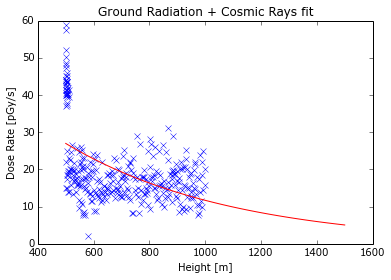

In [17]:
# Ground Radiation + Cosmic Rays fit

max_altitude = 1000
min_altitude = 500

x = [0] * values
y = [0] * values
i = 0
for n in range(0,values):
    if (altitude[n]>min_altitude) and (altitude[n]<max_altitude):
        x[i] = altitude[n]
        y[i] = radiation[n]
        i = i + 1

def func_gr(x, a, b):
  return a*exp(-1*(x/b))

p0 = sy.array([20,4000])
gr_coeffs, matcov = curve_fit(func_gr, x[0:i], y[0:i], p0)

yaj = func_gr(x[0:i], gr_coeffs[0], gr_coeffs[1])
print(gr_coeffs)
print(matcov)

plt.plot(x[0:i],y[0:i],'xb')
ground = 500
top = 1500
plt.plot(np.linspace(ground,top,100), func_gr(np.linspace(ground,top,100), gr_coeffs[0], gr_coeffs[1]),'r-')
plt.title('Ground Radiation + Cosmic Rays fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
plt.show()

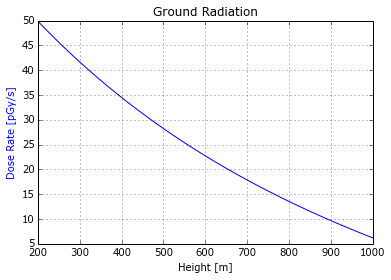

In [18]:
# Ground Radiation

plt.title('Ground Radiation')
plt.ylabel('Dose Rate [pGy/s]',color='blue')
plt.xlabel('Height [m]')

ground = 200
top = 1000
plt.plot(np.linspace(ground,top,100), 
func_gr(np.linspace(ground,top,100), gr_coeffs[0], gr_coeffs[1]) 
- func_cr(np.linspace(ground,top,100), cr_coeffs[0], cr_coeffs[1], cr_coeffs[2]))
plt.grid(True)

6652
[ -2.63948609e-24   4.62757427e-20  -3.36894080e-16   1.31598109e-12
  -2.97060552e-09   3.87284072e-06  -2.72064725e-03   8.43611914e-01
  -3.56860284e+01]


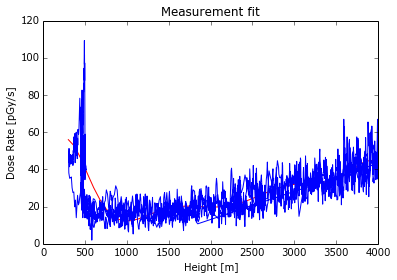

In [19]:
# Measurement  fit

min_altitude = 300
max_altitude = 4000

x = [0] * values
y = [0] * values
i = 0
for n in range(0,values):
    if (altitude[n]>min_altitude) and (altitude[n]<max_altitude):
        x[i] = altitude[n]
        y[i] = radiation[n]
        i = i + 1
        
nval = i - 1

print nval

pf_coef = np.polyfit(x[0:nval], y[0:nval],8)

print pf_coef

p = (np.poly1d(pf_coef))

#>>> p = np.poly1d([1, 2, 3])
#>>> print np.poly1d(p)
#   2
#1 x + 2 x + 3
plt.plot(sy.linspace(min_altitude,max_altitude), p(sy.linspace(min_altitude,max_altitude)), 'r-')

plt.plot(x[0:nval],y[0:nval])
plt.title('Measurement fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
plt.show()

minimum [ 1002.20110055  2026.8134067 ] m n.m.


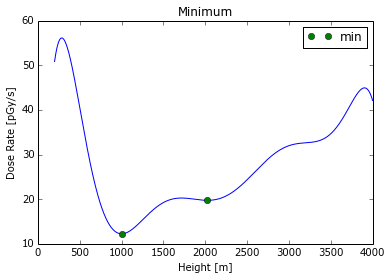

In [20]:
x = linspace(200,4000,2000)
data = p(x)

#a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
#c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max

plot(x,data)
plot(x[b], data[b], "o", label="min")
#plot(x[c], data[c], "o", label="max")
legend()
print "minimum",x[b],"m n.m."
plt.title('Minimum')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')

[  147.53775402  -360.00905734    46.2618439   5804.7399182    -46.71404061]
[[  1.24432461e+01   2.97748046e+01  -5.68088616e+00  -4.10067239e+02
    6.79800391e+00]
 [  2.97748046e+01   1.42066082e+02  -1.17259546e+02  -9.08518947e+03
    1.33051224e+02]
 [ -5.68088616e+00  -1.17259546e+02   1.73720707e+02   1.37415163e+04
   -1.94047824e+02]
 [ -4.10067239e+02  -9.08518947e+03   1.37415163e+04   1.08905332e+06
   -1.53314178e+04]
 [  6.79800391e+00   1.33051224e+02  -1.94047824e+02  -1.53314178e+04
    2.16939409e+02]]


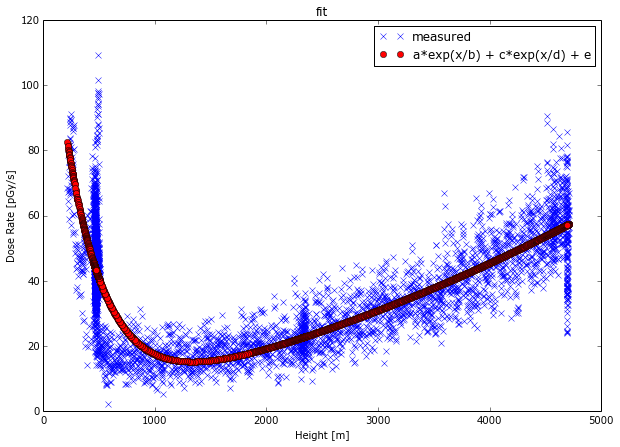

In [21]:
# fit fit

min_altitude = 200

plt.figure(figsize=(10, 7))
x = linspace(400,4000,2000)

x = [0] * values
y = [0] * values
i = 0
for n in range(0,values):
    if altitude[n]>min_altitude:
        x[i] = altitude[n]
        y[i] = radiation[n]
        i = i + 1
        
nval = i - 1

def func(x, a, b, c, d, e):
  return a*exp(x/b) + c*exp(x/d) + e

p0 = sy.array([100,-300,3,2000,1])
coeffs, matcov = curve_fit(func, x[0:nval], y[0:nval], p0)

yaj = func(x, coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4])
print(coeffs)
print(matcov)

plt.plot(x[0:nval],y[0:nval],'x', label="measured")
plt.plot(x[0:nval],yaj[0:nval],'or', label="a*exp(x/b) + c*exp(x/d) + e")
#plt.plot(x,coeffs[0]*exp(x/coeffs[1]),'g-', label="a*exp(x/-b)")
#[0:nval]plt.plot(x,coeffs[2]*exp(x/coeffs[3]),'y-', label="c*exp(x/d)")
plt.title('fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
legend()
plt.show()

minimum [ 1336.46823412] m n.m.


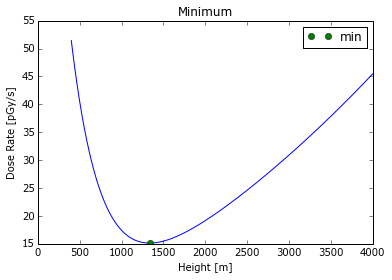

In [22]:
x = linspace(400,4000,2000)
data = func(x[0:nval], coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4])

b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min

plot(x[0:nval],data[0:nval][0:nval])
plot(x[b], data[b], "o", label="min")
#plot(x[c], data[c], "o", label="max")
legend()
print "minimum",x[b],"m n.m."
plt.title('Minimum')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')

In [4]:
import sys
print (sys.version)

2.7.6 (default, Mar 22 2014, 22:59:56) 
[GCC 4.8.2]


In [28]:
a=[1,2,3,4]

In [31]:
a = a[1:]+[0]
#a[-1]=0
print a

[4, 0, 0, 0]


In [41]:
t = np.linspace(1,30,30)

In [44]:
10. %10

0.0